In [2]:
# from google.colab import files
# uploaded = files.upload()

In [3]:
import pandas as pd
import numpy as np

In [4]:
rev_df = pd.read_csv('Amazon_Reviews.csv', engine='python')
rev_df

,Reviewer Name,Profile Link,Country,Review Count,Review Date,Rating,Review Title,Review Text,Date of Experience
0,Eugene ath,/users/66e8185ff1598352d6b3701a,US,1 review,2024-09-16T13:44:26.000Z,Rated 1 out of 5 stars,A Store That Doesn't Want to Sell Anything,"I registered on the website, tried to order a ...","September 16, 2024"
1,Daniel ohalloran,/users/5d75e460200c1f6a6373648c,GB,9 reviews,2024-09-16T18:26:46.000Z,Rated 1 out of 5 stars,Had multiple orders one turned up and…,Had multiple orders one turned up and driver h...,"September 16, 2024"
2,p fisher,/users/546cfcf1000064000197b88f,GB,90 reviews,2024-09-16T21:47:39.000Z,Rated 1 out of 5 stars,I informed these reprobates,I informed these reprobates that I WOULD NOT B...,"September 16, 2024"
3,Greg Dunn,/users/62c35cdbacc0ea0012ccaffa,AU,5 reviews,2024-09-17T07:15:49.000Z,Rated 1 out of 5 stars,Advertise one price then increase it on website,I have bought from Amazon before and no proble...,"September 17, 2024"
4,Sheila Hannah,/users/5ddbe429478d88251550610e,GB,8 reviews,2024-09-16T18:37:17.000Z,Rated 1 out of 5 stars,If I could give a lower rate I would,If I could give a lower rate I would! I cancel...,"September 16, 2024"
...,...,...,...,...,...,...,...,...,...
21209,Anders T,/users/47bd4ffe0000640001001044,DK,1 review,2009-03-22T13:14:12.000Z,Rated 5 out of 5 stars,Fast!!,"I have had perfect order fulfillment, and fast...","March 22, 2009"
21210,David E,/users/495bbbc0000064000100a972,US,2 reviews,2008-12-31T18:57:31.000Z,Rated 5 out of 5 stars,Consistently Excellent,"I have had perfect order fulfillment, and fast...","December 31, 2008"
21211,Joseph Harding,/users/48cfacbf0000640001005d04,GB,3 reviews,2008-09-16T13:05:05.000Z,Rated 3 out of 5 stars,Good prices but delivery can take time :(,I always find myself going back to amazon beco...,"September 16, 2008"
21212,Mads Dørup,/users/474aaec70000640001000a44,DK,82 reviews,2008-04-28T11:09:05.000Z,Rated 5 out of 5 stars,World-class online shopping,I have placed an abundance of orders with Amaz...,"April 28, 2008"


In [5]:
rev_df.info()
print()
print(f'Null : \n{rev_df.isnull().sum()}')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21214 entries, 0 to 21213
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Reviewer Name       21214 non-null  object
 1   Profile Link        21163 non-null  object
 2   Country             21054 non-null  object
 3   Review Count        21055 non-null  object
 4   Review Date         21055 non-null  object
 5   Rating              21055 non-null  object
 6   Review Title        21055 non-null  object
 7   Review Text         21055 non-null  object
 8   Date of Experience  20947 non-null  object
dtypes: object(9)
memory usage: 1.5+ MB

Null : 
Reviewer Name           0
Profile Link           51
Country               160
Review Count          159
Review Date           159
Rating                159
Review Title          159
Review Text           159
Date of Experience    267
dtype: int64


In [6]:
# correcting all the column names

rev_df.columns = rev_df.columns.str.lower().str.replace(' ', '_')
rev_df.columns

Index(['reviewer_name', 'profile_link', 'country', 'review_count',
       'review_date', 'rating', 'review_title', 'review_text',
       'date_of_experience'],
      dtype='object')

In [7]:
# cleaning the profile links and removing duplicates
import uuid

uid = uuid.uuid4().hex[:24]
profile = f'/user/{uid}'
rev_df['profile_link'].fillna(profile,inplace=True)
rev_df.drop_duplicates(inplace=True)


<ipython-input-7-e2d94c52b8d0>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  rev_df['profile_link'].fillna(profile,inplace=True)


In [8]:
# usingmos common country to fill in the country names using mode
most_common_country = rev_df['country'].mode()[0]
rev_df['country'].fillna(most_common_country, inplace=True)
rev_df

<ipython-input-8-e7df5d195954>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  rev_df['country'].fillna(most_common_country, inplace=True)


,reviewer_name,profile_link,country,review_count,review_date,rating,review_title,review_text,date_of_experience
0,Eugene ath,/users/66e8185ff1598352d6b3701a,US,1 review,2024-09-16T13:44:26.000Z,Rated 1 out of 5 stars,A Store That Doesn't Want to Sell Anything,"I registered on the website, tried to order a ...","September 16, 2024"
1,Daniel ohalloran,/users/5d75e460200c1f6a6373648c,GB,9 reviews,2024-09-16T18:26:46.000Z,Rated 1 out of 5 stars,Had multiple orders one turned up and…,Had multiple orders one turned up and driver h...,"September 16, 2024"
2,p fisher,/users/546cfcf1000064000197b88f,GB,90 reviews,2024-09-16T21:47:39.000Z,Rated 1 out of 5 stars,I informed these reprobates,I informed these reprobates that I WOULD NOT B...,"September 16, 2024"
3,Greg Dunn,/users/62c35cdbacc0ea0012ccaffa,AU,5 reviews,2024-09-17T07:15:49.000Z,Rated 1 out of 5 stars,Advertise one price then increase it on website,I have bought from Amazon before and no proble...,"September 17, 2024"
4,Sheila Hannah,/users/5ddbe429478d88251550610e,GB,8 reviews,2024-09-16T18:37:17.000Z,Rated 1 out of 5 stars,If I could give a lower rate I would,If I could give a lower rate I would! I cancel...,"September 16, 2024"
...,...,...,...,...,...,...,...,...,...
21209,Anders T,/users/47bd4ffe0000640001001044,DK,1 review,2009-03-22T13:14:12.000Z,Rated 5 out of 5 stars,Fast!!,"I have had perfect order fulfillment, and fast...","March 22, 2009"
21210,David E,/users/495bbbc0000064000100a972,US,2 reviews,2008-12-31T18:57:31.000Z,Rated 5 out of 5 stars,Consistently Excellent,"I have had perfect order fulfillment, and fast...","December 31, 2008"
21211,Joseph Harding,/users/48cfacbf0000640001005d04,GB,3 reviews,2008-09-16T13:05:05.000Z,Rated 3 out of 5 stars,Good prices but delivery can take time :(,I always find myself going back to amazon beco...,"September 16, 2008"
21212,Mads Dørup,/users/474aaec70000640001000a44,DK,82 reviews,2008-04-28T11:09:05.000Z,Rated 5 out of 5 stars,World-class online shopping,I have placed an abundance of orders with Amaz...,"April 28, 2008"


In [9]:
# from the review count column numerocal values are extraxcted

rev_df['review_count'] = rev_df['review_count'].str.extract(r'(\d+)')
rev_df['review_count'] = pd.to_numeric(rev_df['review_count'], errors='coerce')
mean_val = rev_df['review_count'].mean()
rev_df['review_count'].fillna(mean_val, inplace=True)
rev_df['review_count'] = rev_df['review_count'].astype(int)
rev_df

<ipython-input-9-df4aa9abf6db>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  rev_df['review_count'].fillna(mean_val, inplace=True)


,reviewer_name,profile_link,country,review_count,review_date,rating,review_title,review_text,date_of_experience
0,Eugene ath,/users/66e8185ff1598352d6b3701a,US,1,2024-09-16T13:44:26.000Z,Rated 1 out of 5 stars,A Store That Doesn't Want to Sell Anything,"I registered on the website, tried to order a ...","September 16, 2024"
1,Daniel ohalloran,/users/5d75e460200c1f6a6373648c,GB,9,2024-09-16T18:26:46.000Z,Rated 1 out of 5 stars,Had multiple orders one turned up and…,Had multiple orders one turned up and driver h...,"September 16, 2024"
2,p fisher,/users/546cfcf1000064000197b88f,GB,90,2024-09-16T21:47:39.000Z,Rated 1 out of 5 stars,I informed these reprobates,I informed these reprobates that I WOULD NOT B...,"September 16, 2024"
3,Greg Dunn,/users/62c35cdbacc0ea0012ccaffa,AU,5,2024-09-17T07:15:49.000Z,Rated 1 out of 5 stars,Advertise one price then increase it on website,I have bought from Amazon before and no proble...,"September 17, 2024"
4,Sheila Hannah,/users/5ddbe429478d88251550610e,GB,8,2024-09-16T18:37:17.000Z,Rated 1 out of 5 stars,If I could give a lower rate I would,If I could give a lower rate I would! I cancel...,"September 16, 2024"
...,...,...,...,...,...,...,...,...,...
21209,Anders T,/users/47bd4ffe0000640001001044,DK,1,2009-03-22T13:14:12.000Z,Rated 5 out of 5 stars,Fast!!,"I have had perfect order fulfillment, and fast...","March 22, 2009"
21210,David E,/users/495bbbc0000064000100a972,US,2,2008-12-31T18:57:31.000Z,Rated 5 out of 5 stars,Consistently Excellent,"I have had perfect order fulfillment, and fast...","December 31, 2008"
21211,Joseph Harding,/users/48cfacbf0000640001005d04,GB,3,2008-09-16T13:05:05.000Z,Rated 3 out of 5 stars,Good prices but delivery can take time :(,I always find myself going back to amazon beco...,"September 16, 2008"
21212,Mads Dørup,/users/474aaec70000640001000a44,DK,82,2008-04-28T11:09:05.000Z,Rated 5 out of 5 stars,World-class online shopping,I have placed an abundance of orders with Amaz...,"April 28, 2008"


In [10]:
# Transforming the review_date column as per datetime

rev_df['review_date'] = pd.to_datetime(rev_df['review_date'], errors='coerce')
# rev_df['review_date'] = rev_df['review_date'].dt.strftime('%Y-%m-%d')
most_common_date = rev_df['review_date'].mode()[0]
rev_df['review_date'] = rev_df['review_date'].fillna(most_common_date)

rev_df['date_of_experience'] = pd.to_datetime(rev_df['date_of_experience'])
# rev_df['date_of_experience'] = rev_df['date_of_experience'].dt.strftime('%Y-%m-%d')
most_common_date = rev_df['date_of_experience'].mode()[0]
rev_df['date_of_experience'] = rev_df['date_of_experience'].fillna(most_common_date)

rev_df

,reviewer_name,profile_link,country,review_count,review_date,rating,review_title,review_text,date_of_experience
0,Eugene ath,/users/66e8185ff1598352d6b3701a,US,1,2024-09-16 13:44:26+00:00,Rated 1 out of 5 stars,A Store That Doesn't Want to Sell Anything,"I registered on the website, tried to order a ...",2024-09-16
1,Daniel ohalloran,/users/5d75e460200c1f6a6373648c,GB,9,2024-09-16 18:26:46+00:00,Rated 1 out of 5 stars,Had multiple orders one turned up and…,Had multiple orders one turned up and driver h...,2024-09-16
2,p fisher,/users/546cfcf1000064000197b88f,GB,90,2024-09-16 21:47:39+00:00,Rated 1 out of 5 stars,I informed these reprobates,I informed these reprobates that I WOULD NOT B...,2024-09-16
3,Greg Dunn,/users/62c35cdbacc0ea0012ccaffa,AU,5,2024-09-17 07:15:49+00:00,Rated 1 out of 5 stars,Advertise one price then increase it on website,I have bought from Amazon before and no proble...,2024-09-17
4,Sheila Hannah,/users/5ddbe429478d88251550610e,GB,8,2024-09-16 18:37:17+00:00,Rated 1 out of 5 stars,If I could give a lower rate I would,If I could give a lower rate I would! I cancel...,2024-09-16
...,...,...,...,...,...,...,...,...,...
21209,Anders T,/users/47bd4ffe0000640001001044,DK,1,2009-03-22 13:14:12+00:00,Rated 5 out of 5 stars,Fast!!,"I have had perfect order fulfillment, and fast...",2009-03-22
21210,David E,/users/495bbbc0000064000100a972,US,2,2008-12-31 18:57:31+00:00,Rated 5 out of 5 stars,Consistently Excellent,"I have had perfect order fulfillment, and fast...",2008-12-31
21211,Joseph Harding,/users/48cfacbf0000640001005d04,GB,3,2008-09-16 13:05:05+00:00,Rated 3 out of 5 stars,Good prices but delivery can take time :(,I always find myself going back to amazon beco...,2008-09-16
21212,Mads Dørup,/users/474aaec70000640001000a44,DK,82,2008-04-28 11:09:05+00:00,Rated 5 out of 5 stars,World-class online shopping,I have placed an abundance of orders with Amaz...,2008-04-28


In [11]:
# Extracting the numerical value from string

rev_df['rating'] = rev_df['rating'].str.extract(r'Rated (\d+) out of 5 stars')
rev_df['rating'] = pd.to_numeric(rev_df['rating'], errors='coerce')
mean_value = rev_df['rating'].mean()
rev_df['rating'] = rev_df['rating'].fillna(mean_value).round().astype(int)

In [12]:
rev_df['review_title'] = rev_df['review_title'].fillna('N/A')
rev_df['review_text'] = rev_df['review_text'].fillna('N/A')

rev_df['text_features'] = rev_df['review_text'] + ' ' + rev_df['review_title']

In [13]:
from textblob import TextBlob

rev_df['polarity'] = rev_df['review_text'].apply(lambda x: TextBlob(x).sentiment.polarity)
rev_df['sentiment'] = rev_df['polarity'].apply(lambda x: 'positive' if x > 0 else ('negative' if x < 0 else 'neutral'))
rev_df

,reviewer_name,profile_link,country,review_count,review_date,rating,review_title,review_text,date_of_experience,text_features,polarity,sentiment
0,Eugene ath,/users/66e8185ff1598352d6b3701a,US,1,2024-09-16 13:44:26+00:00,1,A Store That Doesn't Want to Sell Anything,"I registered on the website, tried to order a ...",2024-09-16,"I registered on the website, tried to order a ...",-0.125000,negative
1,Daniel ohalloran,/users/5d75e460200c1f6a6373648c,GB,9,2024-09-16 18:26:46+00:00,1,Had multiple orders one turned up and…,Had multiple orders one turned up and driver h...,2024-09-16,Had multiple orders one turned up and driver h...,-0.333333,negative
2,p fisher,/users/546cfcf1000064000197b88f,GB,90,2024-09-16 21:47:39+00:00,1,I informed these reprobates,I informed these reprobates that I WOULD NOT B...,2024-09-16,I informed these reprobates that I WOULD NOT B...,-0.227381,negative
3,Greg Dunn,/users/62c35cdbacc0ea0012ccaffa,AU,5,2024-09-17 07:15:49+00:00,1,Advertise one price then increase it on website,I have bought from Amazon before and no proble...,2024-09-17,I have bought from Amazon before and no proble...,-0.140000,negative
4,Sheila Hannah,/users/5ddbe429478d88251550610e,GB,8,2024-09-16 18:37:17+00:00,1,If I could give a lower rate I would,If I could give a lower rate I would! I cancel...,2024-09-16,If I could give a lower rate I would! I cancel...,0.000000,neutral
...,...,...,...,...,...,...,...,...,...,...,...,...
21209,Anders T,/users/47bd4ffe0000640001001044,DK,1,2009-03-22 13:14:12+00:00,5,Fast!!,"I have had perfect order fulfillment, and fast...",2009-03-22,"I have had perfect order fulfillment, and fast...",0.652500,positive
21210,David E,/users/495bbbc0000064000100a972,US,2,2008-12-31 18:57:31+00:00,5,Consistently Excellent,"I have had perfect order fulfillment, and fast...",2008-12-31,"I have had perfect order fulfillment, and fast...",0.477670,positive
21211,Joseph Harding,/users/48cfacbf0000640001005d04,GB,3,2008-09-16 13:05:05+00:00,3,Good prices but delivery can take time :(,I always find myself going back to amazon beco...,2008-09-16,I always find myself going back to amazon beco...,0.033333,positive
21212,Mads Dørup,/users/474aaec70000640001000a44,DK,82,2008-04-28 11:09:05+00:00,5,World-class online shopping,I have placed an abundance of orders with Amaz...,2008-04-28,I have placed an abundance of orders with Amaz...,0.191521,positive


In [14]:
rev_df['has_negative_title'] = rev_df['review_title'].str.contains("w ointed", case=False, na=False)
rev_df['has_positive_title'] = rev_df['review_title'].str.contains("great|excellent|amazing|perfect|love", case=False, na=False)
rev_df

,reviewer_name,profile_link,country,review_count,review_date,rating,review_title,review_text,date_of_experience,text_features,polarity,sentiment,has_negative_title,has_positive_title
0,Eugene ath,/users/66e8185ff1598352d6b3701a,US,1,2024-09-16 13:44:26+00:00,1,A Store That Doesn't Want to Sell Anything,"I registered on the website, tried to order a ...",2024-09-16,"I registered on the website, tried to order a ...",-0.125000,negative,False,False
1,Daniel ohalloran,/users/5d75e460200c1f6a6373648c,GB,9,2024-09-16 18:26:46+00:00,1,Had multiple orders one turned up and…,Had multiple orders one turned up and driver h...,2024-09-16,Had multiple orders one turned up and driver h...,-0.333333,negative,False,False
2,p fisher,/users/546cfcf1000064000197b88f,GB,90,2024-09-16 21:47:39+00:00,1,I informed these reprobates,I informed these reprobates that I WOULD NOT B...,2024-09-16,I informed these reprobates that I WOULD NOT B...,-0.227381,negative,False,False
3,Greg Dunn,/users/62c35cdbacc0ea0012ccaffa,AU,5,2024-09-17 07:15:49+00:00,1,Advertise one price then increase it on website,I have bought from Amazon before and no proble...,2024-09-17,I have bought from Amazon before and no proble...,-0.140000,negative,False,False
4,Sheila Hannah,/users/5ddbe429478d88251550610e,GB,8,2024-09-16 18:37:17+00:00,1,If I could give a lower rate I would,If I could give a lower rate I would! I cancel...,2024-09-16,If I could give a lower rate I would! I cancel...,0.000000,neutral,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21209,Anders T,/users/47bd4ffe0000640001001044,DK,1,2009-03-22 13:14:12+00:00,5,Fast!!,"I have had perfect order fulfillment, and fast...",2009-03-22,"I have had perfect order fulfillment, and fast...",0.652500,positive,False,False
21210,David E,/users/495bbbc0000064000100a972,US,2,2008-12-31 18:57:31+00:00,5,Consistently Excellent,"I have had perfect order fulfillment, and fast...",2008-12-31,"I have had perfect order fulfillment, and fast...",0.477670,positive,False,True
21211,Joseph Harding,/users/48cfacbf0000640001005d04,GB,3,2008-09-16 13:05:05+00:00,3,Good prices but delivery can take time :(,I always find myself going back to amazon beco...,2008-09-16,I always find myself going back to amazon beco...,0.033333,positive,False,False
21212,Mads Dørup,/users/474aaec70000640001000a44,DK,82,2008-04-28 11:09:05+00:00,5,World-class online shopping,I have placed an abundance of orders with Amaz...,2008-04-28,I have placed an abundance of orders with Amaz...,0.191521,positive,False,False


In [15]:
# from google.colab import files
# rev_df.to_csv('cleaned_ecomm_data.csv', index=False)
# files.download('cleaned_ecomm_data.csv')

# **Machine Learning**

              precision    recall  f1-score   support

    negative       0.89      0.90      0.89      1692
     neutral       0.96      0.68      0.80       465
    positive       0.89      0.94      0.91      2086

    accuracy                           0.89      4243
   macro avg       0.91      0.84      0.87      4243
weighted avg       0.90      0.89      0.89      4243



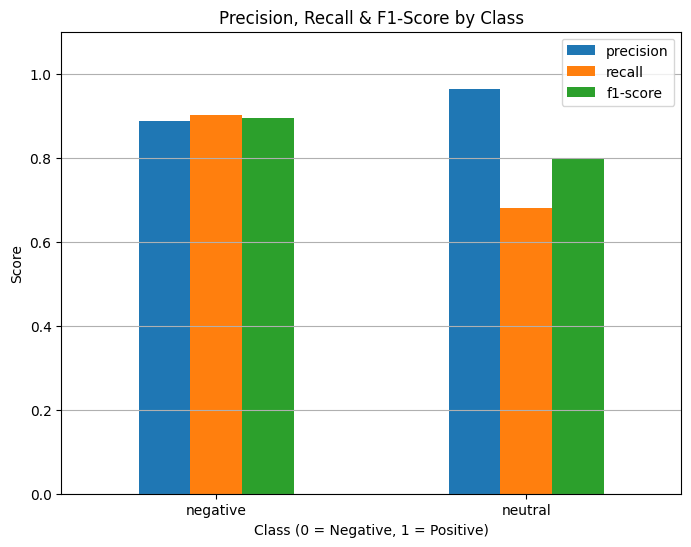

In [16]:
# Importing required libraries for prediction using machine learning

from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt

tf = TfidfVectorizer()
x = tf.fit_transform(rev_df['text_features'])
y = rev_df['sentiment']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

model = LogisticRegression()
model.fit(x, y)
y_pred = model.predict(x_test)

print(classification_report(y_test, y_pred))
report = classification_report(y_test, y_pred, output_dict=True)
metrics_df = pd.DataFrame(report).transpose().iloc[:2][['precision', 'recall', 'f1-score']]
metrics_df.plot(kind='bar', figsize=(8, 6))
plt.title('Precision, Recall & F1-Score by Class')
plt.xlabel('Class (0 = Negative, 1 = Positive)')
plt.ylabel('Score')
plt.ylim(0, 1.1)
plt.grid(True, axis='y')
plt.xticks(rotation=0)
plt.show()

# **Cross-Validation**

Cross-Validation Scores : 0.8197030403016733
Mean Accuracy : 0.81
Classification Report :               precision    recall  f1-score   support

    negative       0.79      0.82      0.80      8340
     neutral       0.85      0.54      0.66      2251
    positive       0.83      0.86      0.85     10621

    accuracy                           0.81     21212
   macro avg       0.82      0.74      0.77     21212
weighted avg       0.81      0.81      0.81     21212

Accuracy Score : 0.81


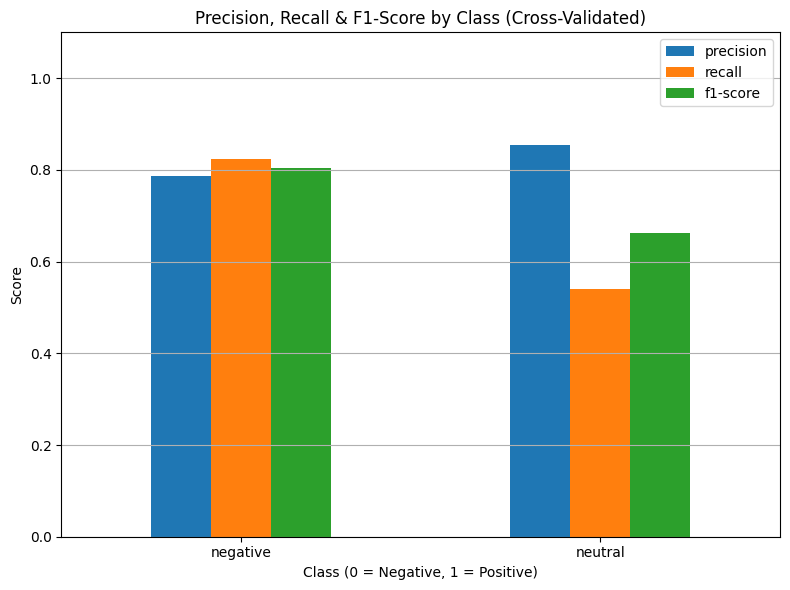

In [21]:
from sklearn.model_selection import cross_val_score, StratifiedKFold, cross_val_predict
from sklearn.metrics import classification_report, accuracy_score

tf = TfidfVectorizer()
x = tf.fit_transform(rev_df['text_features'])
y = rev_df['sentiment']

model = LogisticRegression()

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(model, x, y, cv=skf, scoring='accuracy')

print(f'Cross-Validation Scores : {cv_scores[0]}')

y_pred_cv = cross_val_predict(model, x, y, cv=skf)
print(f'Classification Report : {classification_report(y, y_pred_cv)}')
print(f'Accuracy Score : {accuracy_score(y, y_pred_cv):.2f}')

report = classification_report(y, y_pred_cv, output_dict=True)
metrics_df = pd.DataFrame(report).transpose().iloc[:2][['precision', 'recall', 'f1-score']]

# Plot metrics
metrics_df.plot(kind='bar', figsize=(8, 6))
plt.title('Precision, Recall & F1-Score by Class (Cross-Validated)')
plt.xlabel('Class (0 = Negative, 1 = Positive)')
plt.ylabel('Score')
plt.ylim(0, 1.1)
plt.grid(True, axis='y')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


# **NLP**

In [17]:
from textblob import TextBlob
import nltk
nltk.download('punkt_tab')

aspects = ['price', 'delivery', 'quality']
def aspect_sentiment(text):
    blob = TextBlob(text)
    aspect_sentiments = {}
    for aspect in aspects:
      for sentence in blob.sentences:
        if aspect in sentence.lower():
          aspect_sentiments[aspect] = sentence.sentiment.polarity
    return aspect_sentiments

rev_df['Aspect_Sentiment'] = rev_df['text_features'].apply(aspect_sentiment)
print(rev_df[['text_features','Aspect_Sentiment']].head())

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


                                       text_features   Aspect_Sentiment
0  I registered on the website, tried to order a ...                 {}
1  Had multiple orders one turned up and driver h...  {'delivery': 0.0}
2  I informed these reprobates that I WOULD NOT B...                 {}
3  I have bought from Amazon before and no proble...     {'price': 0.0}
4  If I could give a lower rate I would! I cancel...                 {}


# **DL Review**

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

Device set to use cpu


{'label': 'POSITIVE', 'score': 0.9736936092376709}


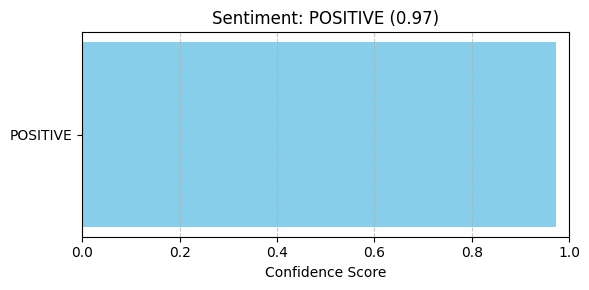

In [18]:
from transformers import pipeline

classifier = pipeline("sentiment-analysis", model="distilbert-base-uncased-finetuned-sst-2-english")
text = "Quality was average."
result = classifier(text)[0]
print(result)

plt.figure(figsize=(6, 3))
plt.barh(result['label'], result['score'], color='skyblue')
plt.xlim(0, 1)
plt.xlabel("Confidence Score")
plt.title(f"Sentiment: {result['label']} ({result['score']:.2f})")
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()